In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [26]:
simulated = pd.read_csv('../fitness_model/simulation/simulated_freqs.csv', index_col=0)
colors = pickle.load(open('../figures/colors.p', 'rb'))

sns.set(style='whitegrid', font_scale=1.2)

In [4]:
# model_performance = pd.read_csv('../fitness_model/simulation/model_performance_fine.csv', index_col = 0)
# model_performance.drop('Unnamed: 0.1', axis=1, inplace=True)
# model_performance = model_performance.reset_index()

# fit_params = ['DENV1_f0','DENV2_f0','DENV3_f0','beta', 'gamma', 'sigma']
# metrics = ['abs_error', 'accuracy', 'beta', 'delta_sse', 'information_gain', 'pearson_r2', 'spearman_r']
# input_params = {
#     'DENV1_f0': 0.7,
#     'DENV2_f0': 0.85,
#     'DENV3_f0': 0.4,
#     'beta': 3.25,
#     'gamma': 0.55,
#     'sigma': 2.35
# }

In [5]:
# def plot_profile_likelihoods(model_performance, metric):

#     if metric == 'abs_error' or metric == 'rmse':
#         best_fit = model_performance.ix[model_performance[metric].idxmin()]
#     else:
#         best_fit = model_performance.ix[model_performance[metric].idxmax()]
# #     print ('Best fit (optimizing %s):\n'%metric, best_fit)
    
#     fig, axes = plt.subplots(ncols=len(fit_params), nrows=1, figsize=(3*len(fit_params), 3), sharey=True)
#     for profile_param,ax in zip(fit_params, axes):
        
#         fixed_params = [p for p in fit_params if p != profile_param]
        
#         plot_data = model_performance
#         for fp in fixed_params:
#             plot_data = plot_data.loc[plot_data[fp] == best_fit[fp]]
        
#         sns.regplot(profile_param, metric, data=plot_data, fit_reg=False, ax=ax, color='gray')
#         ax.set_xlabel(profile_param)
#         ax.set_ylabel(metric)
        
#         ax.plot([input_params[profile_param], input_params[profile_param]], 
#                 [0,0.2],
#                 linestyle='--', c='gray')
        
#     ax.set_ylim(0,0.2)
#     plt.tight_layout()
# #     plt.savefig('../profile-likelihoods/%s_%s_perf.png', dpi=300, bbox_inches='tight')
#     plt.show()
    
# #     return best_fit

    
# plot_profile_likelihoods(model_performance, 'rmse')

In [27]:
def plot_timecourse(df, ax = None, ls='-', ylabel = ''):
    if not ax:
        w = 12
        h = 4
        fig, ax = plt.subplots(1,1,figsize=(w,h))
    for clade in df.columns.values:
        c = colors[clade]
        ax.plot(df[clade].index.values, df[clade], 
                c=c, linestyle=ls, label=clade)

        
    ax.legend(loc=(1,.7))
    ax.set_ylabel(ylabel)
    ax.set_ylim(0,1)
    ax.set_xlim(1970,2015)
    ax.set_ylabel('Simulated frequency')
#     plt.show()

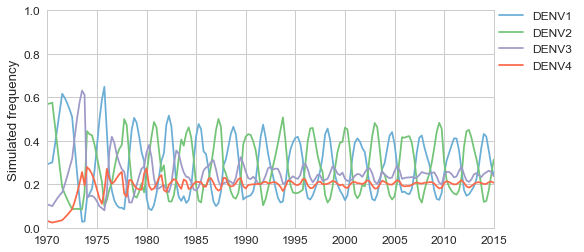

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
plot_timecourse(simulated, ax)
plt.savefig('./png/simulated_frequencies_high_beta.png')

In [29]:
simulated_serotype_parameters = pd.read_csv('../fitness_model/simulation/simulated_fitParameters_freqs.csv', 
                                            index_col=0)

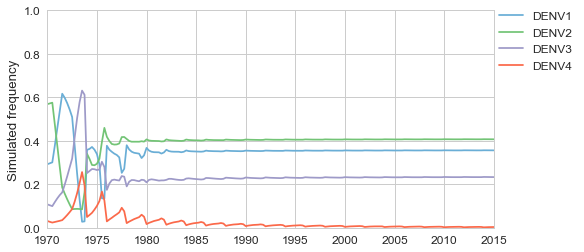

In [30]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
plot_timecourse(simulated_serotype_parameters, ax)
plt.savefig('./png/simulated_fitParameters_freqs.png', dpi=300, bbox_inches='tight')